In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch_geometric import data
from torch_geometric.loader import DataLoader
import wandb

In [2]:
%run model.ipynb
%run utils.ipynb
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device='cpu'

In [3]:
# Set training parameters
learning_rate = 1e-3
batch_size = 1
num_epochs = 100
patience = 5
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="AML_GNN",

    # track hyperparameters and run metadata
    config={
        "learning_rate": learning_rate,
        "architecture": "GNN",
        "dataset": "dummy",
        "epochs": num_epochs,
    }
)

wandb: Currently logged in as: radu-gaghi (caceu). Use `wandb login --relogin` to force relogin


In [4]:
x = torch.tensor([[0.0], [1.0]])
y = torch.tensor([[1, 0], [0, 1]])
edge_index = torch.tensor([[0, 1]]).T
dataset = [data.Data(x, y=y, edge_index=edge_index)]
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
for batch in train_loader:
    print(batch)

DataBatch(x=[2, 1], edge_index=[2, 1], y=[2, 2], batch=[2], ptr=[2])


In [5]:
node_dim = 1
edge_dim = 1
output_dim = 2
hidden_dim = 4
n_gnn_layers = 3
K = 1
dropout_rate = 0.0

# Create model
model = GNN_Example(node_dim, edge_dim, output_dim, hidden_dim, n_gnn_layers, K, dropout_rate).to(device)
print(model)

GNN_Example(
  (dropout): Dropout(p=0.0, inplace=False)
  (relu): PReLU(num_parameters=1)
  (convs): ModuleList(
    (0): TAGConv(1, 4, K=1)
    (1): TAGConv(4, 4, K=1)
    (2): TAGConv(4, 2, K=1)
  )
)


In [6]:
# Create the optimizer to train the neural network via back-propagation
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [7]:
train_losses, validation_losses = train(num_epochs, model, train_loader, val_loader, optimizer, criterion, device, patience)

epoch: 10 	 training loss: 0.467 	 validation loss: 0.4648
epoch: 20 	 training loss: 0.4449 	 validation loss: 0.4427
epoch: 30 	 training loss: 0.4233 	 validation loss: 0.4211
epoch: 40 	 training loss: 0.4012 	 validation loss: 0.3989
epoch: 50 	 training loss: 0.3782 	 validation loss: 0.3759
epoch: 60 	 training loss: 0.3544 	 validation loss: 0.352
epoch: 70 	 training loss: 0.3298 	 validation loss: 0.3274
epoch: 80 	 training loss: 0.3047 	 validation loss: 0.3021
epoch: 90 	 training loss: 0.2791 	 validation loss: 0.2765
epoch: 100 	 training loss: 0.2534 	 validation loss: 0.2508
Model training took 4.300 seconds


train loss,████▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
validation oss,████▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
train loss,0.25335
validation oss,0.25079


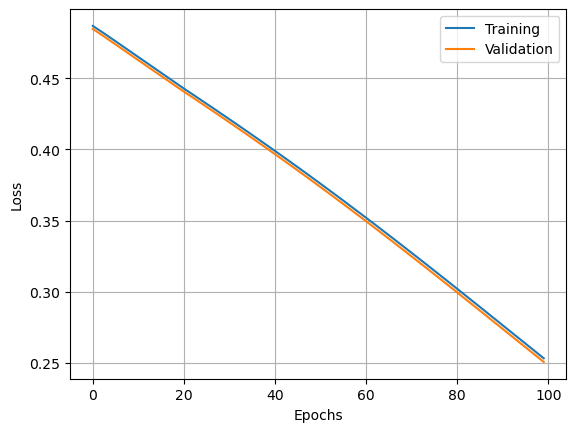

In [8]:
plt.grid()
plt.plot(train_losses, label='Training')
plt.plot(validation_losses, label='Validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()